In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("datasets/breast_cancer/data.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,NaN
1,91544002,B,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,...,20.74,76.08,411.1,0.1662,0.2031,0.12560,0.09514,0.2780,0.11680,NaN
2,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
3,88466802,B,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,NaN
4,91813702,B,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,NaN


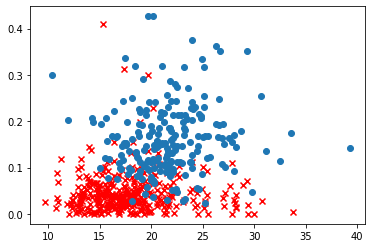

In [3]:
plt.scatter(data[data.diagnosis=="B"]["texture_mean"], data[data.diagnosis=="B"]["concavity_mean"], marker="x", color="red")
plt.scatter(data[data.diagnosis=="M"]["texture_mean"], data[data.diagnosis=="M"]["concavity_mean"], marker="o")

In [4]:
features = data.columns.values.tolist()[2:-1]

y = np.array([pd.get_dummies(data["diagnosis"])["B"]]).T
X = np.array(pd.get_dummies(data[features]))

X_train = tf.constant(X[:(int(len(X)*0.75)), :])
X_val = tf.constant(X[(int(len(X)*0.75)):, :])
y_train = tf.constant(y[:(int(len(X)*0.75)), :])
y_val = tf.constant(y[(int(len(X)*0.75)):, :])

2021-10-13 18:13:03.566416: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
X_train = tf.keras.utils.normalize(X_train)
X_val = tf.keras.utils.normalize(X_val)

y_train.shape

TensorShape([426, 1])

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(7, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100)

2021-10-13 18:13:52.273818: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.6747 - accuracy: 0.6221
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6221
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6221
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6221
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6221
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.6221
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6221
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.6221
Epoch 9/100
14/14 [==============================] -

In [9]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(val_loss, val_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9231
0.25621145963668823 0.9230769276618958


In [12]:
predictions = model.predict([X_val]).T

for i in range(predictions.shape[1]):    
        if predictions[0,i] > 0.5:
            predictions[0,i] = 1
        else:
            predictions[0,i] = 0
       
predictions = predictions.astype(np.int)

Consider rewriting this model with the Functional API.


In [14]:
predictions = np.squeeze(predictions)


# output = pd.DataFrame({'Sex': np.squeeze(X_val.T[:, 3]), 'Predictions': predictions, 'Actual': np.squeeze(y_val)})
output = pd.DataFrame({'Prediction': np.squeeze(y_val), 'Survived': predictions})
output.to_csv('mamo.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
